<br>

## Importing Libs and setting up the environment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

class color: # para formatar os prints
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
# Function to show the values on the charts

def show_values(axs, orient="v", space=0.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height() * 0.01)
                value = "{:.1f}".format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height() * 0.5)
                value = "{:.1f}".format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [3]:
df = pd.read_excel(r"C:\Users\013809631\Box\Shape_Case\O&G Equipment Data.xlsx")

print(df.shape)
df.head()

(800, 10)


,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
0,1,3,6,44.235186,47.657254,46.441769,64.820327,66.454520,44.483250,False
1,2,2,4,60.807234,63.172076,62.005951,80.714431,81.246405,60.228715,False
2,3,2,1,79.027536,83.032190,82.642110,98.254386,98.785196,80.993479,False
3,4,2,3,79.716242,100.508634,122.362321,121.363429,118.652538,80.315567,False
4,5,2,5,39.989054,51.764833,42.514302,61.037910,50.716469,64.245166,False


<br>
<hr>

# Descriptive Analysis

<br>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cycle        800 non-null    int64  
 1   Preset_1     800 non-null    int64  
 2   Preset_2     800 non-null    int64  
 3   Temperature  800 non-null    float64
 4   Pressure     800 non-null    float64
 5   VibrationX   800 non-null    float64
 6   VibrationY   800 non-null    float64
 7   VibrationZ   800 non-null    float64
 8   Frequency    800 non-null    float64
 9   Fail         800 non-null    bool   
dtypes: bool(1), float64(6), int64(3)
memory usage: 57.2 KB


In [5]:
# Removing the cientific notation of the statistical describe
pd.set_option('display.float_format', lambda x: '%.5f' % x) 

# Plotting a statistical summary of data by variable
df.describe()

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency
count,800.00000,800.00000,800.00000,800.00000,800.00000,800.00000,800.00000,800.00000,800.00000
mean,400.50000,1.98875,4.55125,69.26349,78.99794,73.86027,72.78688,71.86621,68.22345
std,231.08440,0.80588,2.29324,25.53625,32.50183,31.22963,32.73975,27.84462,29.13870
min,1.00000,1.00000,1.00000,2.08935,3.48028,3.84634,10.05774,18.78417,4.38010
25%,200.75000,1.00000,3.00000,51.04013,55.50856,50.75246,48.52398,50.78764,45.86176
50%,400.50000,2.00000,5.00000,65.90672,75.01485,69.39495,65.50477,69.31924,65.66425
75%,600.25000,3.00000,7.00000,80.52722,99.30253,90.19506,94.07557,88.89120,90.09746
max,800.00000,3.00000,8.00000,255.60783,189.99568,230.86114,193.56995,230.95113,178.09030


Cycle          0
Preset_1       0
Preset_2       0
Temperature    0
Pressure       0
VibrationX     0
VibrationY     0
VibrationZ     0
Frequency      0
Fail           0
dtype: int64


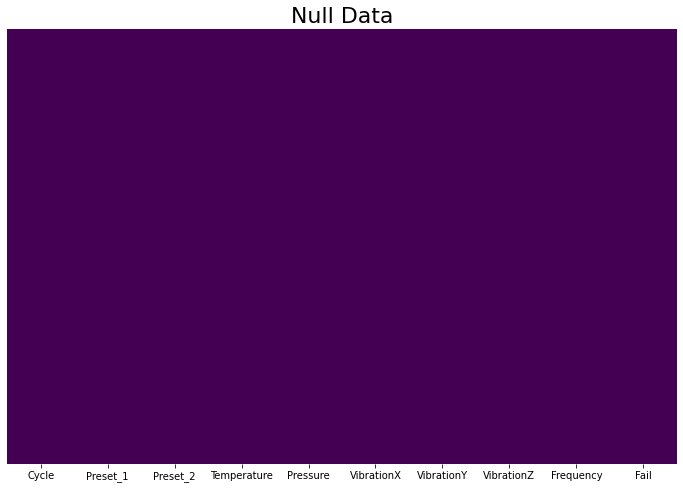

In [6]:
# Analysing the Null/NaN data
print(pd.isnull(df).sum())

plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null Data',size = 22)
plt.show()

### Running some Histograms to understand more precisely the data distribution by variables

Distribuition of the Preset 1 variable in percent: 
2   35.12500
1   33.00000
3   31.87500
Name: Preset_1, dtype: float64 %.




Text(0, 0.5, 'Record count')

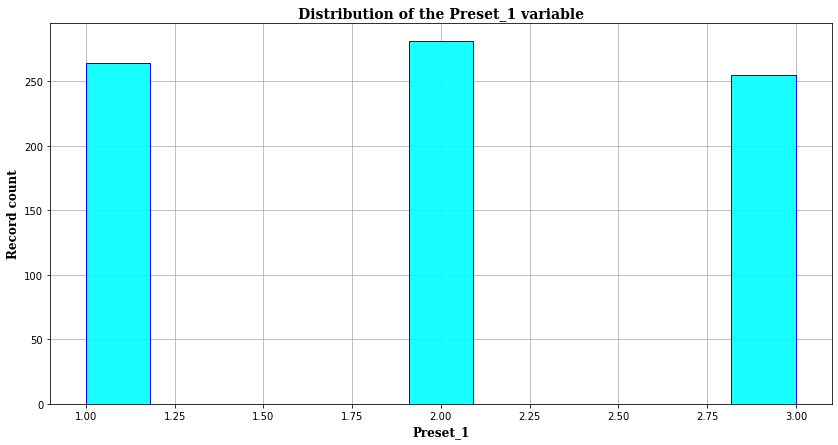

In [28]:
print(color.BOLD + 'Distribuition of the Preset 1 variable in percent: \n{} %.'.format(df['Preset_1'].value_counts(normalize=True)*100))
print('\n')

# Understanding the distribution of the Preset 1 variable
plt.figure(figsize = (14,7))
sns.histplot(x = 'Preset_1',data = df, color = '#00FFFF', edgecolor="blue", linewidth=1, alpha = 0.9, zorder = 3)

plt.grid(True, zorder = 0)

plt.title('Distribution of the Preset_1 variable', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 14})
plt.xlabel('Preset_1', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.ylabel('Record count', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})

Distribuition of the Preset 2 variable in percent: 
7   13.62500
6   12.62500
3   12.62500
2   12.62500
5   12.50000
8   12.50000
1   11.87500
4   11.62500
Name: Preset_2, dtype: float64 %.




Text(0, 0.5, 'Record count')

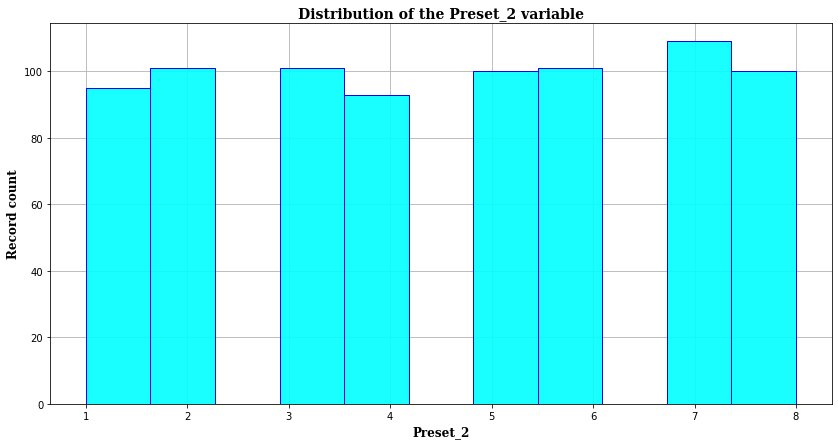

In [29]:
print(color.BOLD + 'Distribuition of the Preset 2 variable in percent: \n{} %.'.format(df['Preset_2'].value_counts(normalize=True)*100))
print('\n')

# Understanding the distribution of the Preset 2 variable
plt.figure(figsize = (14,7))
sns.histplot(x = 'Preset_2',data = df, color = '#00FFFF', edgecolor="blue", linewidth=1, alpha = 0.9, zorder = 3)

plt.grid(True, zorder = 0)

plt.title('Distribution of the Preset_2 variable', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 14})
plt.xlabel('Preset_2', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.ylabel('Record count', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})

Text(0, 0.5, 'Record count')

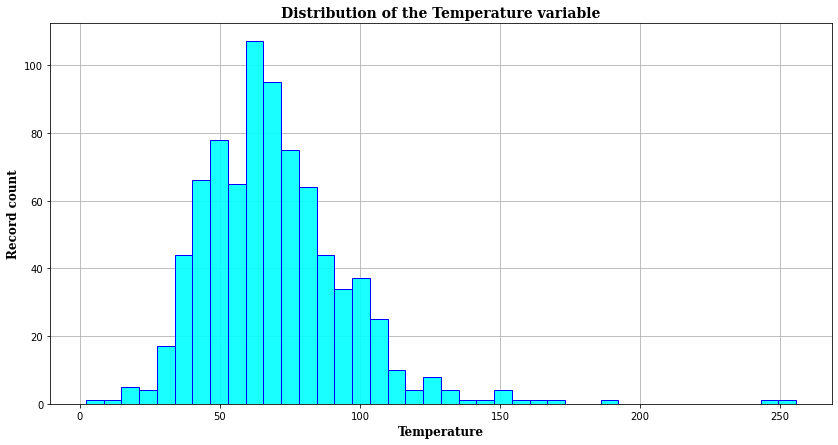

In [30]:
# Understanding the distribution of the Temperature variable
plt.figure(figsize = (14,7))
sns.histplot(x = 'Temperature',data = df, color = '#00FFFF', edgecolor="blue", linewidth=1, alpha = 0.9, zorder = 3)

plt.grid(True, zorder = 0)

plt.title('Distribution of the Temperature variable', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 14})
plt.xlabel('Temperature', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.ylabel('Record count', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})

Text(0, 0.5, 'Record count')

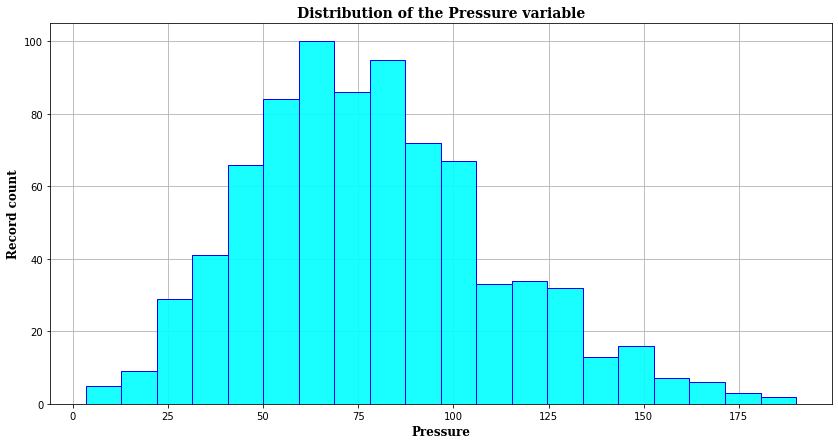

In [31]:
# Understanding the distribution of the Pressure variable
plt.figure(figsize = (14,7))
sns.histplot(x = 'Pressure',data = df, color = '#00FFFF', edgecolor="blue", linewidth=1, alpha = 0.9, zorder = 3)

plt.grid(True, zorder = 0)

plt.title('Distribution of the Pressure variable', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 14})
plt.xlabel('Pressure', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.ylabel('Record count', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})

Text(0, 0.5, 'Record count')

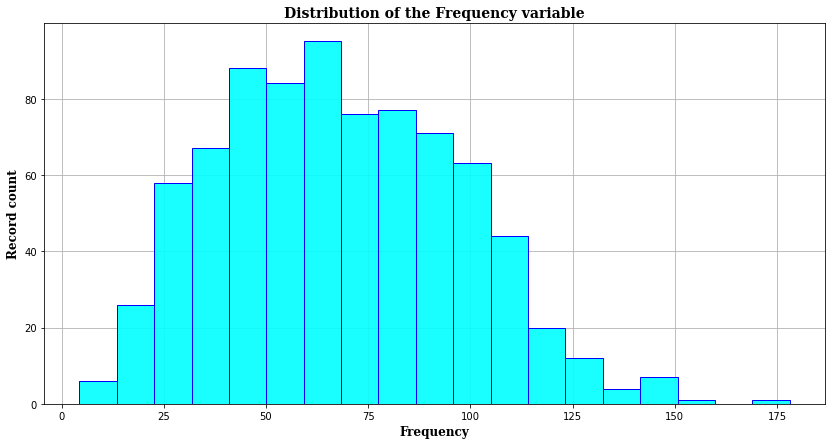

In [32]:
# Understanding the distribution of the Frequency variable
plt.figure(figsize = (14,7))
sns.histplot(x = 'Frequency',data = df, color = '#00FFFF', edgecolor="blue", linewidth=1, alpha = 0.9, zorder = 3)

plt.grid(True, zorder = 0)

plt.title('Distribution of the Frequency variable', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 14})
plt.xlabel('Frequency', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})
plt.ylabel('Record count', fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 12})

In [33]:
# Understanding the distribution of the Fail (target) variable
df['Fail'].value_counts()

False    734
True      66
Name: Fail, dtype: int64

<AxesSubplot:>

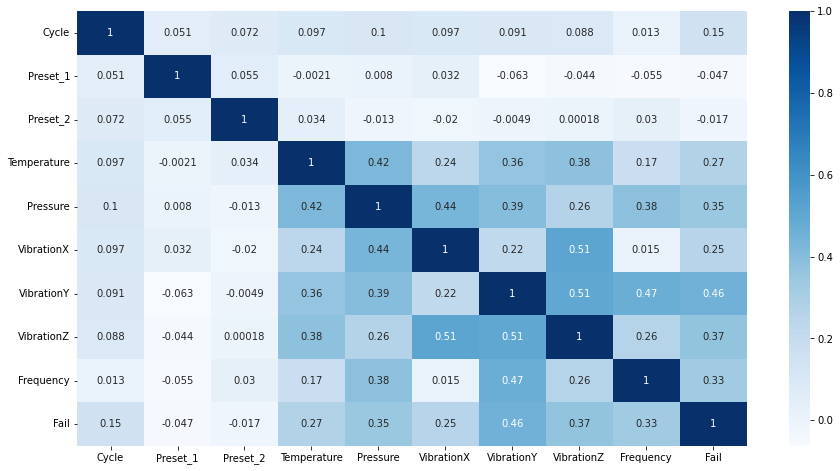

In [13]:
# Understanding the correlation between the variables of the dataset
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

<br>
<hr>

# Diagnostic analysis

<br>

### < Calculate how many times the equipment has failed >

In [14]:
# Grouping the data by Fail variable and than counting it
failed = df.groupby('Fail').agg({'Fail':'count'})
failed.rename(columns = {'Fail':'Amount_of_times'}, inplace = True)

# Calculating Percentage
failed['Percentage'] = (failed['Amount_of_times'] / failed['Amount_of_times'].sum()) * 100
# Plotting the consolidated table
failed

,Amount_of_times,Percentage
Fail,,
False,734,91.75000
True,66,8.25000


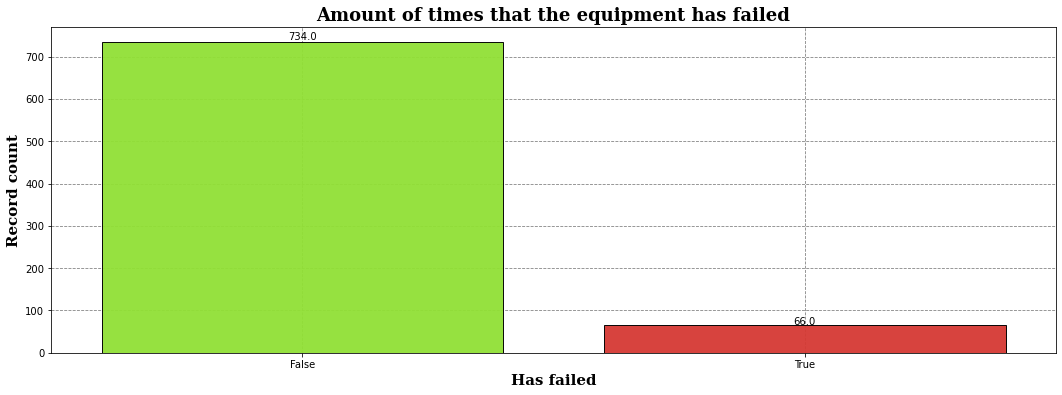

In [15]:
failed_chart = failed.reset_index()

plt.figure(figsize=(18, 6))

ax = sns.barplot(
    data=failed_chart,
    x="Fail",
    y="Amount_of_times",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

plt.title(
    "Amount of times that the equipment has failed",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Has failed",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Record count",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

show_values(ax)

<br>

### < Categorize equipment failures by setups configurations (preset 1 and preset 2) >

<br>

In [16]:
categorization_presets = df.groupby(['Fail','Preset_1','Preset_2']).agg({'Fail':'count'})
categorization_presets.rename(columns = {'Fail':'Amount_of_times'}, inplace = True)
categorization_presets.head()

Amount_of_times
Fail  Preset_1 Preset_2                 
False 1        1                      30
               2                      33
               3                      41
               4                      20
               5                      26

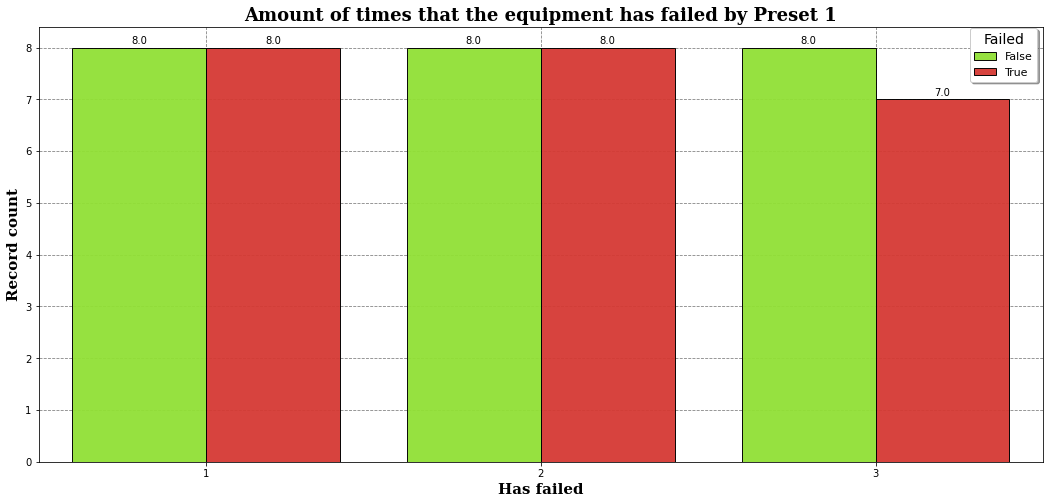

In [17]:
categorization_presets_chart = categorization_presets.reset_index()

plt.figure(figsize=(18, 8))

ax = sns.countplot(
    data=categorization_presets_chart,
    x="Preset_1",
    hue="Fail",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

plt.title(
    "Amount of times that the equipment has failed by Preset 1",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Has failed",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Record count",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=11,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title("Failed", prop={"size": 14})

show_values(ax)

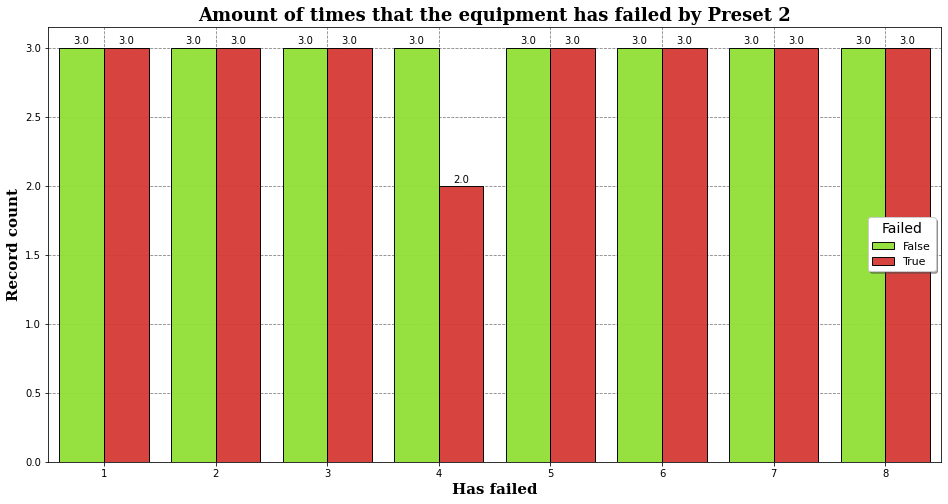

In [18]:
plt.figure(figsize=(16, 8))

ax = sns.countplot(
    data=categorization_presets_chart,
    x="Preset_2",
    hue="Fail",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

plt.title(
    "Amount of times that the equipment has failed by Preset 2",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Has failed",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Record count",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="center right",
    fontsize=11,
    fancybox=True,
    shadow=True,
    
)
L.set_title("Failed", prop={"size": 14})

show_values(ax)

<br>

### Categorize equipment failures by their nature/root cause according to parameter readings


Text(0, 0.5, 'Temperature')

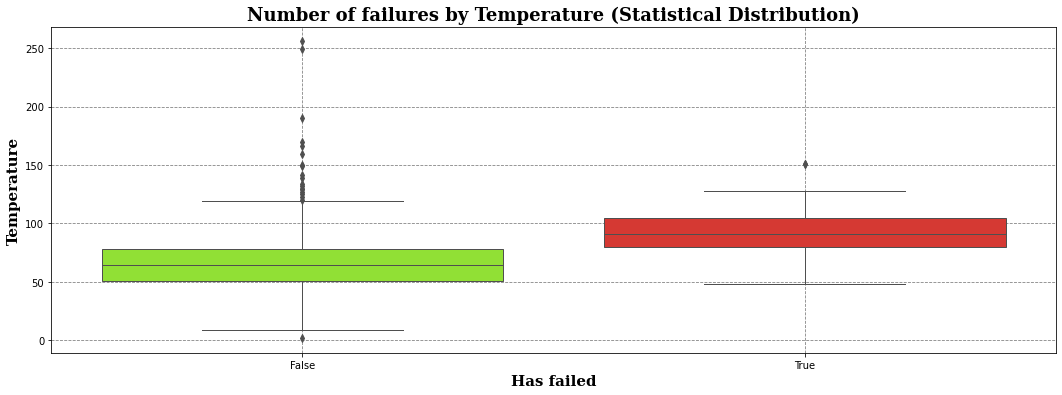

In [19]:
# Analysing the distribution of the variable target (Failure) by the variable Temperature
plt.figure(figsize=(18, 6))

ax = sns.boxplot(
    data=df,
    x="Fail",
    y="Temperature",
    palette={0: "#93fd18", 1: "#f02018"},
    linewidth=1,
    zorder=3,
)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

plt.title(
    "Number of failures by Temperature (Statistical Distribution)",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Has failed",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Temperature",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

Text(0, 0.5, 'Pressure')

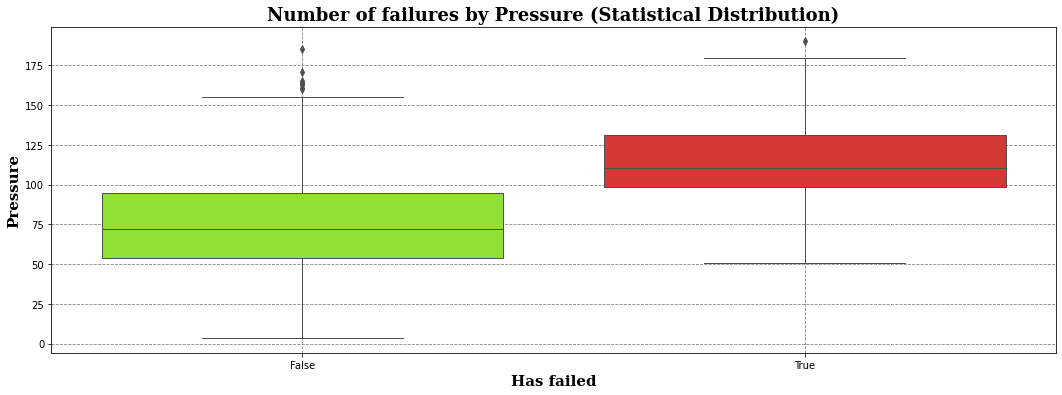

In [20]:
# Analysing the distribution of the variable target (Failure) by the variable Pressure
plt.figure(figsize=(18, 6))

ax = sns.boxplot(
    data=df,
    x="Fail",
    y="Pressure",
    palette={0: "#93fd18", 1: "#f02018"},
    linewidth=1,
)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

plt.title(
    "Number of failures by Pressure (Statistical Distribution)",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Has failed",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Pressure",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

Text(0, 0.5, 'Frequency')

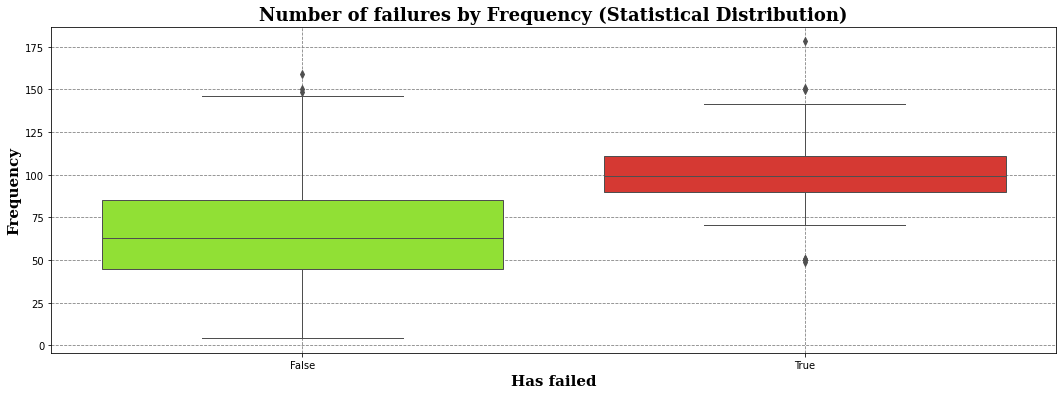

In [21]:
# Analysing the distribution of the variable target (Failure) by the variable Frequency
plt.figure(figsize=(18, 6))

ax = sns.boxplot(
    data=df,
    x="Fail",
    y="Frequency",
    palette={0: "#93fd18", 1: "#f02018"},
    linewidth=1,
)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

plt.title(
    "Number of failures by Frequency (Statistical Distribution)",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Has failed",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Frequency",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

Text(0, 0.5, 'VibrationX')

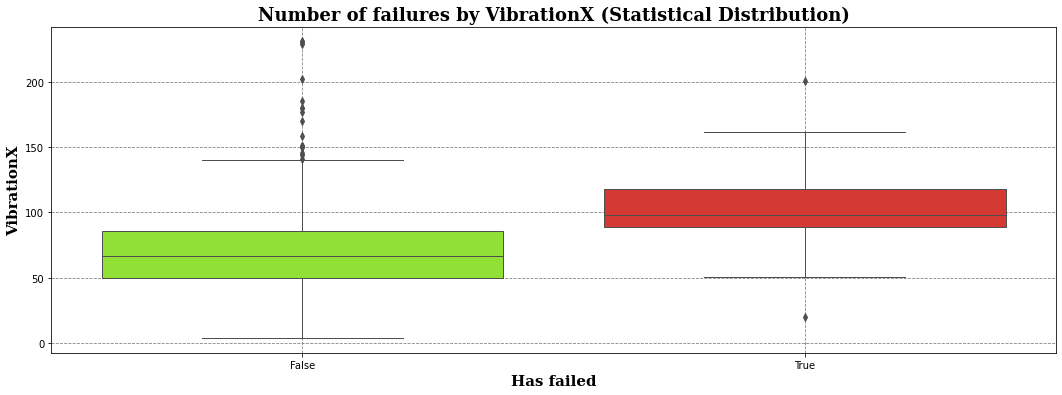

In [22]:
# Analysing the distribution of the variable target (Failure) by the variable VibrationX
plt.figure(figsize=(18, 6))

ax = sns.boxplot(
    data=df,
    x="Fail",
    y="VibrationX",
    palette={0: "#93fd18", 1: "#f02018"},
    linewidth=1,
)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

plt.title(
    "Number of failures by VibrationX (Statistical Distribution)",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Has failed",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "VibrationX",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

Text(0, 0.5, 'VibrationY')

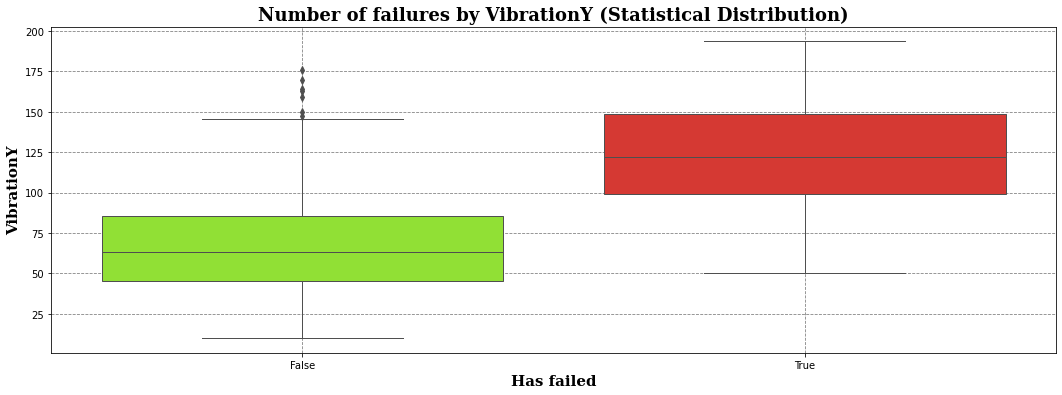

In [23]:
# Analysing the distribution of the variable target (Failure) by the variable VibrationY
plt.figure(figsize=(18, 6))

ax = sns.boxplot(
    data=df,
    x="Fail",
    y="VibrationY",
    palette={0: "#93fd18", 1: "#f02018"},
    linewidth=1,
)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

plt.title(
    "Number of failures by VibrationY (Statistical Distribution)",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Has failed",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "VibrationY",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

Text(0, 0.5, 'VibrationZ')

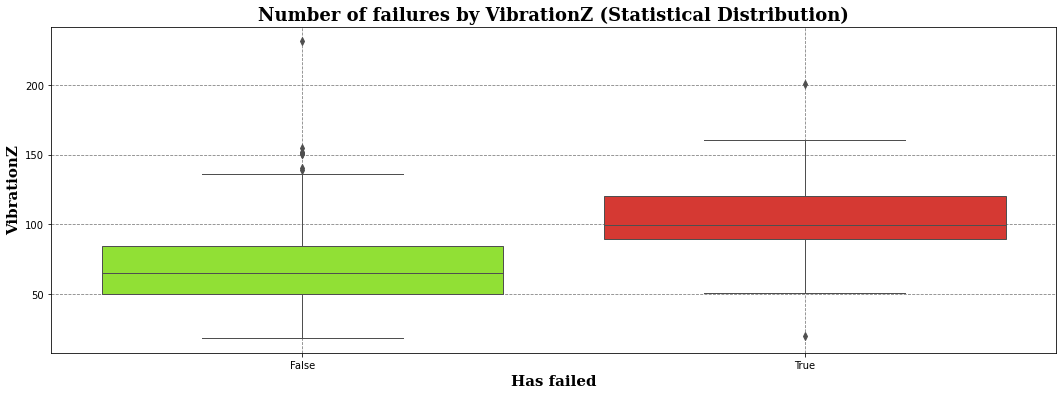

In [24]:
# Analysing the distribution of the variable target (Failure) by the variable VibrationZ
plt.figure(figsize=(18, 6))

ax = sns.boxplot(
    data=df,
    x="Fail",
    y="VibrationZ",
    palette={0: "#93fd18", 1: "#f02018"},
    linewidth=1,
)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

plt.title(
    "Number of failures by VibrationZ (Statistical Distribution)",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Has failed",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "VibrationZ",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

<br>

<hr>